<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/external_datasets/news/weather_data_call_volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# loading weather data

In [2]:
weather = pd.read_csv("https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/external_datasets/Weather%20Datasets/Wisconsin_Weather_WY2017-2023.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,37,39,41,43,45,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
weather.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DAPR_ATTRIBUTES', 'MDPR', 'MDPR_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMAX',
       'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES',
       'WESD', 'WESD_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT03',
       'WT03_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES',
       'WT06', 'WT06_ATTRIBUTES', 'WT11', 'WT11_ATTRIBUTES', 'AWND',
       'AWND_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'WESF', 'WESF_ATTRIBUTES',
       'WSF2', 'WSF2_ATTRIBUTES', 'WT02', 'WT02_ATTRIBUTES', 'WT08',
       'WT08_ATTRIBUTES', 'WT09', 'WT09_ATTRIBUTES'],
      dtype='object')

In [4]:
weather.TMIN.describe()
# https://www.google.com/search?q=mean+temperature+wisconsin

count    83685.000000
mean        35.554604
std         20.466151
min        -39.000000
25%         22.000000
50%         36.000000
75%         53.000000
max         79.000000
Name: TMIN, dtype: float64

In [5]:
weather.STATION.unique()

array(['USC00472839', 'USC00475808', 'USC00478937', 'USC00475563',
       'USC00476518', 'USC00475364', 'USC00475164', 'USC00475120',
       'USC00478951', 'USC00476398', 'USC00473405', 'USC00476678',
       'USC00474195', 'USC00204104', 'USC00475017', 'USC00471078',
       'USC00475932', 'USC00476922', 'USC00470045', 'USC00478827',
       'USC00476208', 'USC00472001', 'USC00475255', 'USC00476827',
       'USC00474482', 'USC00478267', 'USC00476200', 'USC00477113',
       'USC00478027', 'USC00475516', 'USC00474546', 'USC00204090',
       'USC00478171', 'USC00470273', 'USW00014898', 'US1WIWN0015',
       'USC00454338', 'USC00476330', 'USC00470239', 'USC00470855',
       'USC00470696', 'US1WIAS0011', 'USC00475091', 'USC00478349'],
      dtype=object)

In [6]:
weather.NAME.unique()

array(['FOND DU LAC WWTP, WI US', 'NEILLSVILLE 3 ESE, WI US',
       'WAUKESHA WWTP, WI US', 'MONDOVI, WI US', 'PHELPS, WI US',
       'MERRILL, WI US', 'MATHER 3 NW, WI US',
       'MARSHFIELD EXPERIMENTAL FARM, WI US', 'WAUPACA, WI US',
       'PARK FALLS DNR HQ, WI US', 'HANCOCK EXPERIMENTAL FARM, WI US',
       'PLYMOUTH WWTP, WI US', 'KEWAUNEE, WI US', 'IRONWOOD, MI US',
       'MANITOWOC, WI US', 'BRODHEAD WWTP, WI US', 'NEW LONDON, WI US',
       'RACINE WWTP, WI US', 'AFTON JANESVILLE WWTP, WI US',
       'VIROQUA, WI US', 'OCONTO 4 W, WI US', 'DARLINGTON WWTP, WI US',
       'MEDFORD, WI US', 'PRAIRIE DU CHIEN, WI US',
       'LAKE MILLS WWTP, WI US', 'STURGEON BAY EXPERIMENTAL FARM, WI US',
       'OCONOMOWOC WWTP, WI US', 'RHINELANDER, WI US',
       'SPOONER EXPERIMENTAL FARM, WI US', 'MINOCQUA, WI US',
       'LANCASTER 4 WSW, WI US', 'IRON MTN KINGSFORD WWTP, MI US',
       'STEVENS POINT, WI US', 'UW ARBORETUM MADISON, WI US',
       'GREEN BAY A S INTERNATIONAL AIRPORT,

In [7]:
stevens_point = weather[weather.NAME=="STEVENS POINT, WI US"]
stevens_point["DATE"] = pd.to_datetime(stevens_point.DATE)

<ipython-input-7-38e92e8e7824>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stevens_point["DATE"] = pd.to_datetime(stevens_point.DATE)


# loading uwwi data

In [8]:
uwwi22 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv")
uwwi21 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2021.csv")
uwwi20 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2020.csv")
uwwi = pd.concat([uwwi22, uwwi21, uwwi20])
uwwi["Interaction_CreateStamp"] = pd.to_datetime(uwwi.Interaction_CreateStamp, utc=True)
uwwi["Interaction_EditStamp"] = pd.to_datetime(uwwi.Interaction_EditStamp, utc=True)

In [9]:
stevens_point = stevens_point.iloc[1187:,:]

# temp & call volume

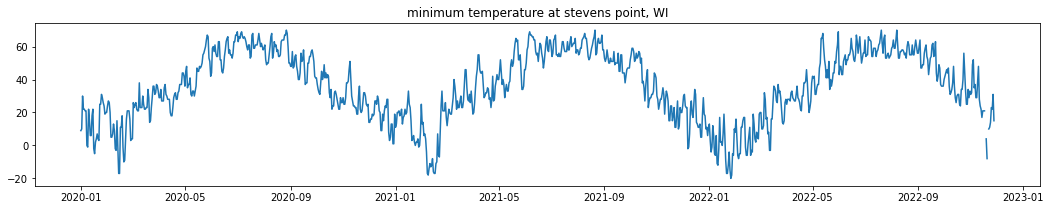

In [10]:
plt.figure(figsize=(18,3))
plt.plot(stevens_point.DATE, stevens_point.TMIN)
plt.title("minimum temperature at stevens point, WI")
plt.show()

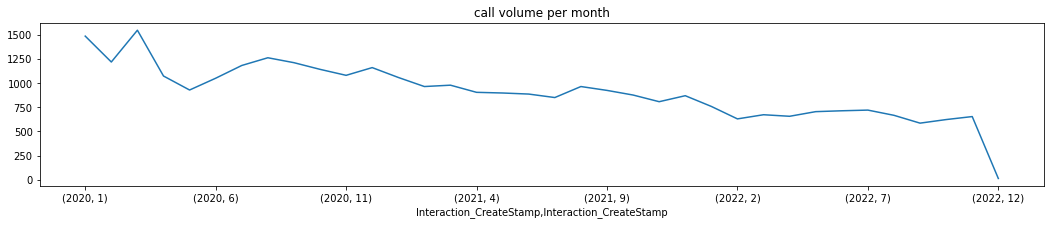

In [11]:
plt.figure(figsize=(18,3))
uwwi["Interaction_CreateStamp"].groupby([uwwi.Interaction_CreateStamp.dt.year, uwwi.Interaction_CreateStamp.dt.month]).agg('count').plot()
plt.title("call volume per month")
plt.show()
# there might be a weak relationship between temperature and call volume: extreme temperatures --> more calls

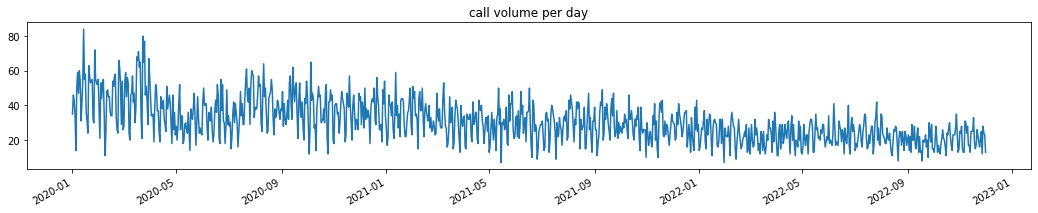

In [12]:
plt.figure(figsize=(18,3))
uwwi["Interaction_CreateStamp"].dt.floor('d').value_counts().plot()
plt.title("call volume per day")
plt.show()

In [13]:
uwwi["Interaction_CreateStamp"][uwwi.InteractionOption_SwfPrimaryNeeds=="['Shelter']"]
# shelter label only since april 2022

4      2022-12-01 14:58:26.516401+00:00
10     2022-12-01 03:03:04.446059+00:00
15     2022-11-30 21:37:21.279956+00:00
20     2022-11-30 17:36:32.901939+00:00
38     2022-11-29 21:14:56.638230+00:00
                     ...               
5091   2022-04-12 14:31:27.872616+00:00
5092   2022-04-12 14:02:00.451293+00:00
5094   2022-04-12 13:20:32.965771+00:00
5102   2022-04-12 04:45:30.248365+00:00
5295   2022-04-04 00:49:06.357149+00:00
Name: Interaction_CreateStamp, Length: 732, dtype: datetime64[ns, UTC]

In [35]:
calls = list(uwwi["Interaction_CreateStamp"].groupby([uwwi.Interaction_CreateStamp.dt.year, uwwi.Interaction_CreateStamp.dt.month,  uwwi.Interaction_CreateStamp.dt.day]).agg('count'))
calls = calls[:-4]
len(calls)

1062

In [29]:
stevens_point.DATE

72694   2020-01-01
72695   2020-01-02
72696   2020-01-03
72697   2020-01-04
72698   2020-01-05
           ...    
73751   2022-11-24
73752   2022-11-25
73753   2022-11-26
73754   2022-11-27
73755   2022-11-28
Name: DATE, Length: 1062, dtype: datetime64[ns]

In [36]:
stevens_point.TMIN

72694     9.0
72695    10.0
72696    30.0
72697    22.0
72698    22.0
         ... 
73751    14.0
73752    23.0
73753    22.0
73754    31.0
73755    15.0
Name: TMIN, Length: 1062, dtype: float64

In [51]:
from numpy import datetime64

tmin_calls = pd.DataFrame()
tmin_calls["date"] = stevens_point["DATE"]
tmin_calls["tmin"] = list(stevens_point["TMIN"])
tmin_calls["calls"] = calls
tmin_calls

,date,tmin,calls
72694,2020-01-01,9.0,35
72695,2020-01-02,10.0,46
72696,2020-01-03,30.0,43
72697,2020-01-04,22.0,34
72698,2020-01-05,22.0,14
...,...,...,...
73751,2022-11-24,14.0,19
73752,2022-11-25,23.0,16
73753,2022-11-26,22.0,21
73754,2022-11-27,31.0,25


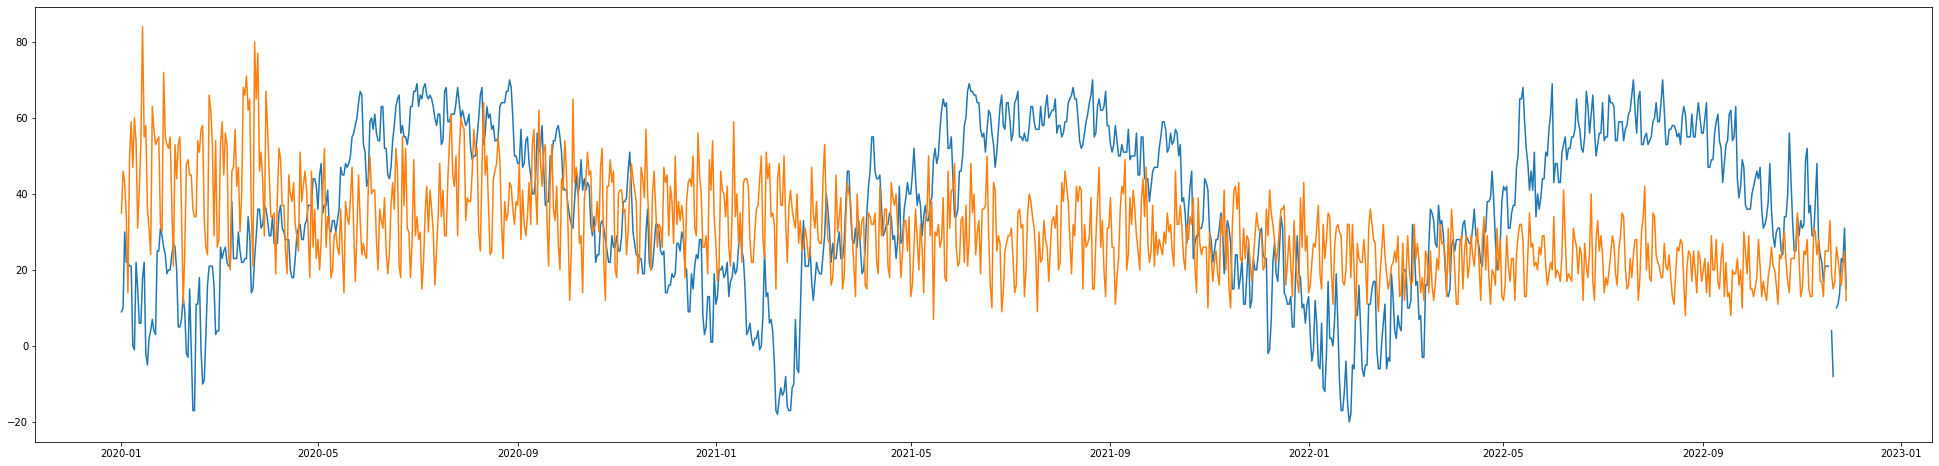

In [58]:
plt.figure(figsize=(34,8))
plt.plot(tmin_calls.date, tmin_calls.tmin)
plt.plot(tmin_calls.date, tmin_calls.calls)
plt.show()

## no correlation tmin & call volume

In [64]:
import pandas as pd
import numpy as np
import scipy.stats as stats

print(tmin_calls.corr())
# almost no correlation between tmin and call colume

           tmin     calls
tmin   1.000000 -0.075762
calls -0.075762  1.000000


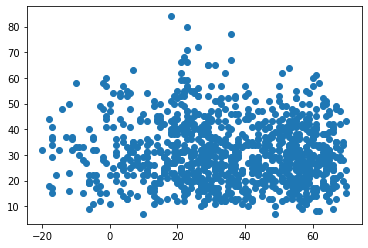

In [74]:
plt.scatter(tmin_calls.tmin, tmin_calls.calls)
# lower temperaturs --> more calls (weak correlation)

[[ 1.         -0.10132215]
 [-0.10132215  1.        ]]


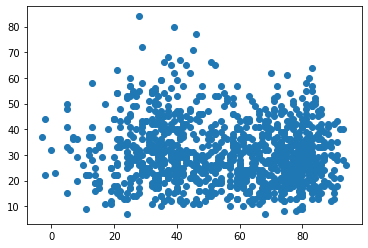

In [120]:
x = stevens_point.TMAX
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.scatter(x,y)
plt.show()
# higher the temperature --> less calls (weak correlation)

In [126]:
# TOBS = Temperature at the time of observation (tenths of degrees C)
stevens_point.TOBS.value_counts()

Series([], Name: TOBS, dtype: int64)

# snow & call volume

## no correlation snowfall & call volume

[[1.         0.06634844]
 [0.06634844 1.        ]]


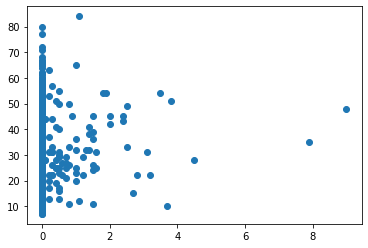

In [83]:
x = stevens_point.SNOW
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.scatter(x,y)
plt.show()
# more snowfall --> more calls (weak correlation)

## weak corr snow depth & call volume

In [107]:
print(stevens_point.SNWD.isna().sum())
snwd = stevens_point.SNWD.fillna(stevens_point.SNWD.mean())
print(snwd.isna().sum())
# highe snow dept --> more calls (weak correlation)

1
0


[[1.         0.21298254]
 [0.21298254 1.        ]]


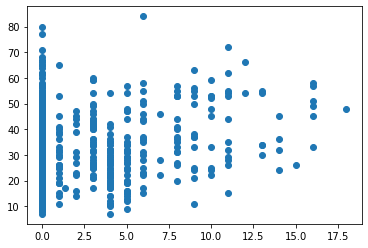

In [108]:
# SNWD = Snow depth (mm)
x = snwd
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.scatter(x,y)
plt.show()

In [124]:
# WESD = Water equivalent of snow on the ground (tenths of mm)
stevens_point.WESD.value_counts()

Series([], Name: WESD, dtype: int64)

# rain & call volume

In [114]:
stevens_point.DAPR.value_counts()

Series([], Name: DAPR, dtype: int64)

In [115]:
stevens_point.MDPR.value_counts()

Series([], Name: MDPR, dtype: int64)

[[ 1.         -0.03201021]
 [-0.03201021  1.        ]]


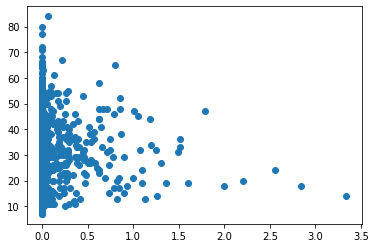

In [121]:
# PRCP = Precipitation (tenths of mm)
x = stevens_point.PRCP
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.scatter(x,y)
plt.show()
# no correlation between precipitation & calls

# weather type & call volume

## Fog, ice fog, or freezing fog (may include heavy fog)

In [139]:
stevens_point.WT01.value_counts()

1.0    45
Name: WT01, dtype: int64

In [151]:
x = []
for el in stevens_point.WT01:
  if el == 1.0:
    x.append(1)
  else:
    x.append(0)
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.show()

[[1.         0.01818052]
 [0.01818052 1.        ]]


## Heavy fog or heaving freezing fog (not always distinguished from fog)

In [133]:
stevens_point.WT02.value_counts()

Series([], Name: WT02, dtype: int64)

## Thunder

In [131]:
stevens_point.WT03.value_counts()

1.0    28
Name: WT03, dtype: int64

In [153]:
x = []
for el in stevens_point.WT03:
  if el == 1.0:
    x.append(1)
  else:
    x.append(0)
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.show()

[[1.         0.03961158]
 [0.03961158 1.        ]]


## Ice pellets, sleet, snow pellets, or small hail

In [135]:
stevens_point.WT04.value_counts()

1.0    3
Name: WT04, dtype: int64

In [155]:
x = []
for el in stevens_point.WT04:
  if el == 1.0:
    x.append(1)
  else:
    x.append(0)
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.show()

[[1.         0.02587386]
 [0.02587386 1.        ]]


## Hail (may include small hail)

In [140]:
stevens_point.WT05.value_counts()

1.0    5
Name: WT05, dtype: int64

In [156]:
x = []
for el in stevens_point.WT05:
  if el == 1.0:
    x.append(1)
  else:
    x.append(0)
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.show()

[[1.         0.02063094]
 [0.02063094 1.        ]]


## Glaze or rime

In [141]:
stevens_point.WT06.value_counts()

1.0    6
Name: WT06, dtype: int64

In [157]:
x = []
for el in stevens_point.WT06:
  if el == 1.0:
    x.append(1)
  else:
    x.append(0)
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.show()

[[1.         0.09235973]
 [0.09235973 1.        ]]


## no Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction in WI

In [ ]:
stevens_point.WT07.value_counts()

## no Smoke or haze

In [154]:
stevens_point.WT08.value_counts()

Series([], Name: WT08, dtype: int64)

## no Blowing or drifting snow

In [146]:
stevens_point.WT09.value_counts()

Series([], Name: WT09, dtype: int64)

## no Tornado, waterspout, or funnel cloud

In [ ]:
stevens_point.WT10.value_counts()

## High or damaging winds

In [147]:
stevens_point.WT11.value_counts()

1.0    4
Name: WT11, dtype: int64

In [158]:
x = []
for el in stevens_point.WT11:
  if el == 1.0:
    x.append(1)
  else:
    x.append(0)
y = tmin_calls.calls
print(np.corrcoef(x,y))
plt.show()

[[1.         0.02147411]
 [0.02147411 1.        ]]


## no Blowing spray

In [ ]:
stevens_point.WT12.value_counts()

## no data for wind speed

In [168]:
stevens_point.AWND.value_counts()

Series([], Name: AWND, dtype: int64)

In [172]:
stevens_point.WSF2.value_counts()

Series([], Name: WSF2, dtype: int64)